<a href="https://colab.research.google.com/github/Evir23/Evir23/blob/main/%D0%98%D0%B4%D0%B5%D0%BD%D1%82%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D1%87%D0%B5%D0%BB%D0%BE%D0%B2%D0%B5%D0%BA%D0%B0_%D0%BF%D0%BE_%D0%BF%D0%BE%D0%B4%D0%BF%D0%B8%D1%81%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Скачивание датасета

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tienen/handwritten-signature-verification")

print("Path to dataset files:", path)

100%|██████████| 2.10G/2.10G [01:15<00:00, 29.9MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/tienen/handwritten-signature-verification/versions/8


# Обучение модели

Found 6171 images belonging to 2 classes.
192/192 ━━━━━━━━━━━━━━━━━━━━ 274s 1s/step - accuracy: 0.5144 - loss: 1.0229


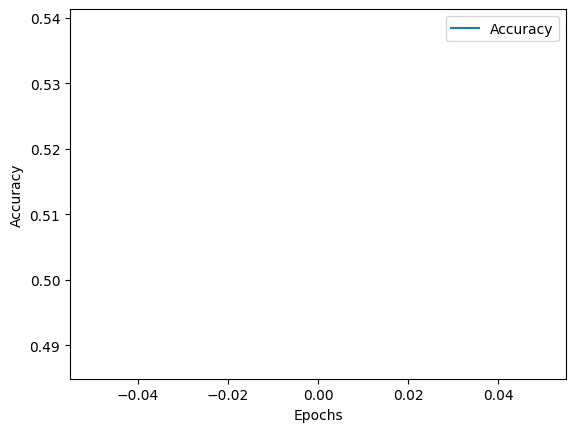

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Путь к датасету
dataset_path = "/content/drive/MyDrive/data/data"  # Замените на путь к вашему датасету

# Папки с подписями
train_dir = os.path.join(dataset_path)

# Размер изображений для обучения
image_size = (128, 128)

# Генераторы для обработки изображений
train_datagen = ImageDataGenerator(rescale=1.0/255)

# Создание генератора для обучения
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='binary',  # Бинарная классификация: реальная или поддельная подпись
    shuffle=True  # Перемешивание данных
)

# Построение модели нейронной сети
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Используем один выход для бинарной классификации
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
epochs = 1
history = model.fit(
    train_generator,
    epochs=epochs,
    steps_per_epoch=train_generator.samples // train_generator.batch_size
)

# Сохранение модели
model.save("signature_verification_model.h5")

# Визуализация результатов обучения
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Сохранение модели в формате .keras
model.save('signature_model.keras')


# Тестирование модели

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


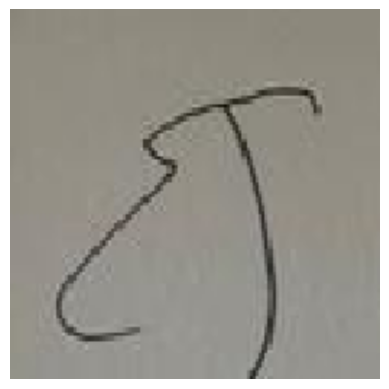

Это настоящая подпись.


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Загрузка обученной модели
model = load_model('signature_model.keras')

# Функция для загрузки изображения, предсказания и вывода результата
def analyze_signature(img_path):
    # Загружаем изображение и приводим его к нужному размеру
    img = image.load_img(img_path, target_size=(128, 128))

    # Преобразуем изображение в массив и нормализуем
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Добавляем дополнительную ось для батча

    # Получаем предсказание модели
    prediction = model.predict(img_array)

    # Отображаем изображение
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Результат: 0 - подделанная подпись, 1 - настоящая подпись
    if prediction >= 0.5:
        print("Это настоящая подпись.")
    else:
        print("Это подделка.")

# Пример использования
img_path = '/content/drive/MyDrive/data/data/forged/1140762B-8D0C-4456-A290-63A82666C69E.jpg/0__1140762B-8D0C-4456-A290-63A82666C69E.jpg.jpg'  # Укажите путь к изображению подписи
analyze_signature(img_path)
